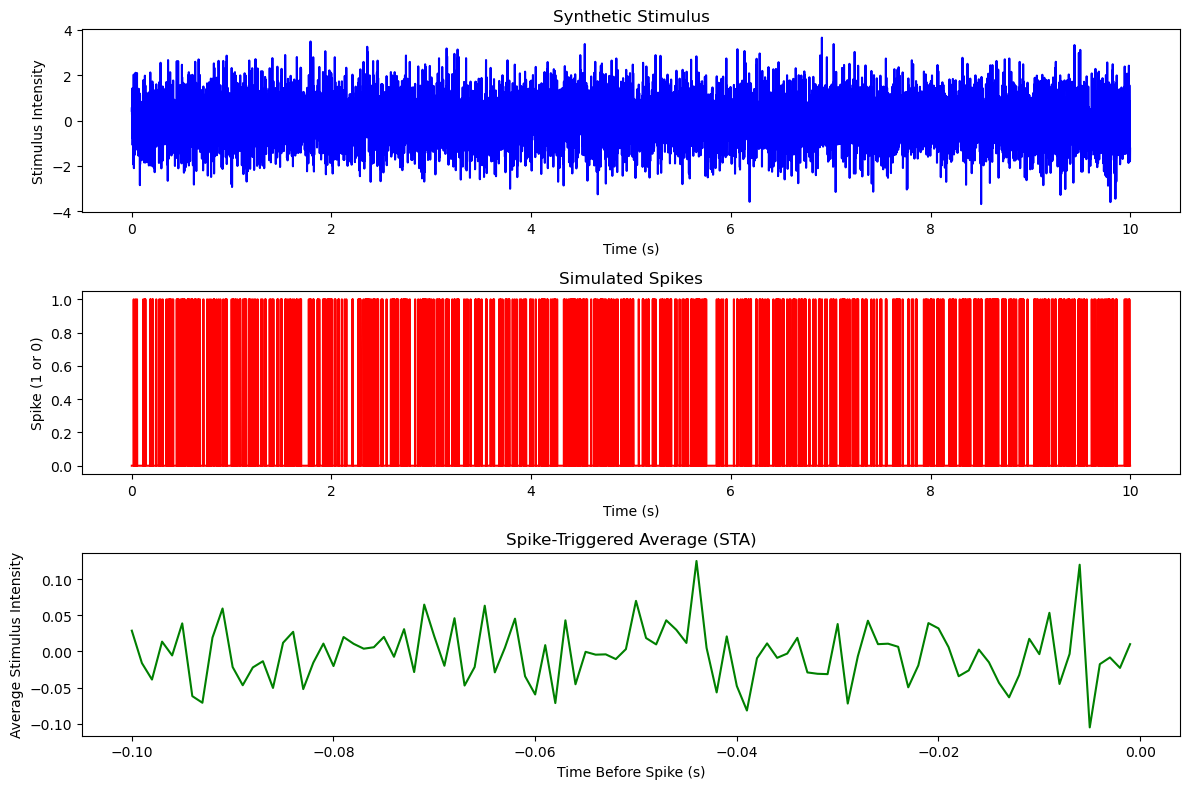

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a synthetic stimulus
def generate_stimulus(T, dt, mean=0, std=1):
    """
    Generate a synthetic time-varying stimulus.

    Parameters:
    - T: Total time of the stimulus (in seconds).
    - dt: Time step (in seconds).
    - mean: Mean of the Gaussian distribution used to generate the stimulus.
    - std: Standard deviation of the Gaussian distribution used to generate the stimulus.

    Returns:
    - stimulus: A 1D numpy array representing the stimulus over time.
    - time: A 1D numpy array representing the time points.
    """
    time = np.arange(0, T, dt)
    stimulus = np.random.normal(mean, std, size=len(time))
    return stimulus, time

# Function to simulate neuronal spikes based on the stimulus
def simulate_spikes(stimulus, threshold):
    """
    Simulate neuronal spikes based on the stimulus.

    Parameters:
    - stimulus: A 1D numpy array representing the stimulus over time.
    - threshold: The threshold above which an action potential (spike) is triggered.

    Returns:
    - spikes: A 1D numpy array of the same length as stimulus with 1s indicating spikes and 0s elsewhere.
    """
    spikes = (stimulus > threshold).astype(int)
    return spikes

# Function to compute the spike-triggered average (STA)
def compute_sta(stimulus, spikes, window_size):
    """
    Compute the spike-triggered average (STA).

    Parameters:
    - stimulus: A 1D numpy array representing the stimulus over time.
    - spikes: A 1D numpy array indicating the times when spikes occurred.
    - window_size: The number of time steps to average before each spike.

    Returns:
    - sta: A 1D numpy array representing the spike-triggered average.
    """
    sta = np.zeros(window_size)
    spike_times = np.where(spikes == 1)[0]
    
    # Calculate STA by averaging the stimulus preceding each spike
    for spike_time in spike_times:
        if spike_time >= window_size:
            sta += stimulus[spike_time-window_size:spike_time]
    
    if len(spike_times) > 0:
        sta /= len(spike_times)
    
    return sta

# Main function to run the simulation
def main():
    # Parameters
    T = 10.0  # Total time in seconds
    dt = 0.001  # Time step in seconds
    threshold = 1.5  # Spike threshold
    window_size = 100  # Number of time steps for STA calculation

    # Generate a synthetic stimulus
    stimulus, time = generate_stimulus(T, dt)

    # Simulate spikes based on the stimulus
    spikes = simulate_spikes(stimulus, threshold)

    # Compute the spike-triggered average (STA)
    sta = compute_sta(stimulus, spikes, window_size)

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Plot the stimulus over time
    plt.subplot(3, 1, 1)
    plt.plot(time, stimulus, color='blue')
    plt.title('Synthetic Stimulus')
    plt.xlabel('Time (s)')
    plt.ylabel('Stimulus Intensity')

    # Plot the spike train over time
    plt.subplot(3, 1, 2)
    plt.plot(time, spikes, color='red')
    plt.title('Simulated Spikes')
    plt.xlabel('Time (s)')
    plt.ylabel('Spike (1 or 0)')

    # Plot the spike-triggered average (STA)
    plt.subplot(3, 1, 3)
    plt.plot(np.arange(-window_size * dt, 0, dt), sta, color='green')
    plt.title('Spike-Triggered Average (STA)')
    plt.xlabel('Time Before Spike (s)')
    plt.ylabel('Average Stimulus Intensity')

    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


In [ ]:
#Program Explanation:
#Stimulus Generation:
#
#The generate_stimulus function creates a synthetic time-varying stimulus using a Gaussian distribution. The stimulus is represented as a 1D array where each element corresponds to the stimulus intensity at a given time point.
#Spike Simulation:

#The simulate_spikes function simulates neuronal spikes by comparing the stimulus intensity to a fixed threshold. If the stimulus exceeds this threshold, a spike (action potential) is generated, represented as a 1 in the spike train array.
#Spike-Triggered Average (STA) Calculation:

#The compute_sta function calculates the average stimulus that preceded each spike, which is the spike-triggered average (STA). It does this by summing the segments of the stimulus that occurred before each spike and averaging them.
#Plotting the Results:

#The program plots the synthetic stimulus, the spike train, and the computed STA. This visualization helps in understanding how the stimulus leads to spike generation and how the STA characterizes the neuron's selectivity to the stimulus.
#Synthetic Data:
#The program uses synthetic stimulus data and a threshold for spike generation. The synthetic data allows for easy manipulation and understanding of the concepts without needing real experimental data.
#This program provides a basic framework for understanding the relationship between a time-varying stimulus and neuronal firing, using the concept of spike-triggered averaging.